# NLP With Hotel Review Part ll

**Author: Darius Smith**

**BrainStation | Data Science | March 20, 2023**

## Table of Contents

[Purpose](#Purpose)

[Logistic Regression](#Logistic-Regression)

[K Nearest Neighbors](#K-Nearest-Neighbors)

[Decision Tree](#Decision-Tree)

[Logistic Regression Part 2](#Logistic-Regression-Part-2)

[Feature Engineering](#Feature-Engineering)

## Purpose:

This notebook is a continuation of hotel reviews using NLP. This previous notebook title **'NLP with Hotel Review Part l'** began with the process of cleaning the data, exploratory data analysis (EDA), and data wrangling with a focus on sentiment analysis focused on `Reviewer_Score` with a focus on positive and negative reviews. This notebook will be focused on developing several machine learning models to correctly label the sentiment behind hotel reviews. 

The first steps before modeling that will be taken are the following: 

- Import all necessary libraries for modeling.
- Load the data.  
- Check for duplicates. 
- Check for missing values. 

In [1]:
#Importing all the libraries needed 
#The usual libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#Splitting data
from sklearn.model_selection import train_test_split 

#Scaler
from sklearn.preprocessing import StandardScaler

#Classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Time stamp for purpose of timing runtime of models
import time

In [2]:
#Loading the test dataframe
test = pd.read_csv('clean_test_dataframe.csv')
test.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Loading the train dataframe
train = pd.read_csv('clean_train_dataframe.csv')
train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Getting an EDA summary 
print(f"Rows: {test.shape[0]}")
print(f"Rows: {train.shape[0]}")
print(f"Columns: {test.shape[1]}")
print(f"Columns: {train.shape[1]}")
print(f"Missing values: {test.isna().sum().sum()}")
print(f"Missing values: {train.isna().sum().sum()}")
print(f"Duplicated rows: {test.duplicated().sum()}")
print(f"Duplicated rows: {train.duplicated().sum()}")

Rows: 4267
Rows: 12798
Columns: 2744
Columns: 2744
Missing values: 0
Missing values: 0
Duplicated rows: 0
Duplicated rows: 0


**Initial Observation on the datasets:**
- Test data has 4,267 rows with 2,744 columns. 
- Train data has 12,798 rows with 2,744 columns. 
- There are no missing values or duplicate data. 

Now, modeling will begin. The target column is the **"rating"** column which is a binary column denoting good ratings as 1 and bad ones as 0. Modeling will take place in sequential order will with detailed objectives and insights. I will start by doing the following: 

1. Assigning features to X and assigning target to y.
2. Splitting the data.
3. Fitting the scaler to the data. (I will be using a standard scaler.)
4. Transforming the training and test features.

In [5]:
#The test dataframe has 2,744 features and the last column is the target. Separating the data accordingly.
X_test = test.drop(columns="rating")
y_test = test["rating"]

In [6]:
#The train dataframe has 2,744 features and the last column is the target. Separating the data accordingly.
X_train = train.drop(columns="rating")
y_train = train["rating"]

In [7]:
#Splitting our data

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    stratify=y_train)

# Check 
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(9598, 2743) (3200, 2743) (9598,) (3200,)


In [8]:
#Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

x_val_ss = SS.transform(X_val)

## Logistic Regression

### Objectives: 

- Employ a linear classifier on this dataset:
- Fit a logisitic regression model to this data with the solver set to lbfgs and observe the accuracy score on the test set.
- Answer the following, what are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? I will be using the regression coefficients to answer this question.
- Reduce the dimensionality of the dataset using PCA, and observe what is the relationship between the number of dimensions and run-time for a logistic regression.
- List one advantage and one disadvantage of dimensionality reduction.

**The next step will be to fit a logistic regression. To do this, I instantiate the logistic model, fit the model, and then score the model.**

In [9]:
#Instantiating the model 
my_logreg = LogisticRegression(random_state=42, solver='lbfgs')

#Fitting the model 
my_logreg.fit(X_train, y_train)

#Scoring the model specifically for the test accuracy
my_logreg.score(X_test, y_test)

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7288493086477619

**After running the logistic regression, the observed accuracy on the test set is ~ 73%. The next step will be to observe what are the 20 words most predictive of a good review (from the positive review column) and what are the 20 words most predictive with a bad review (from the negative review column). I will use the regression coefficients to answer this question.**

In [10]:
my_logreg.coef_

array([[ 0.00046496,  0.11107041, -0.04135597, ...,  0.00104016,
         0.00029619,  0.00044035]])

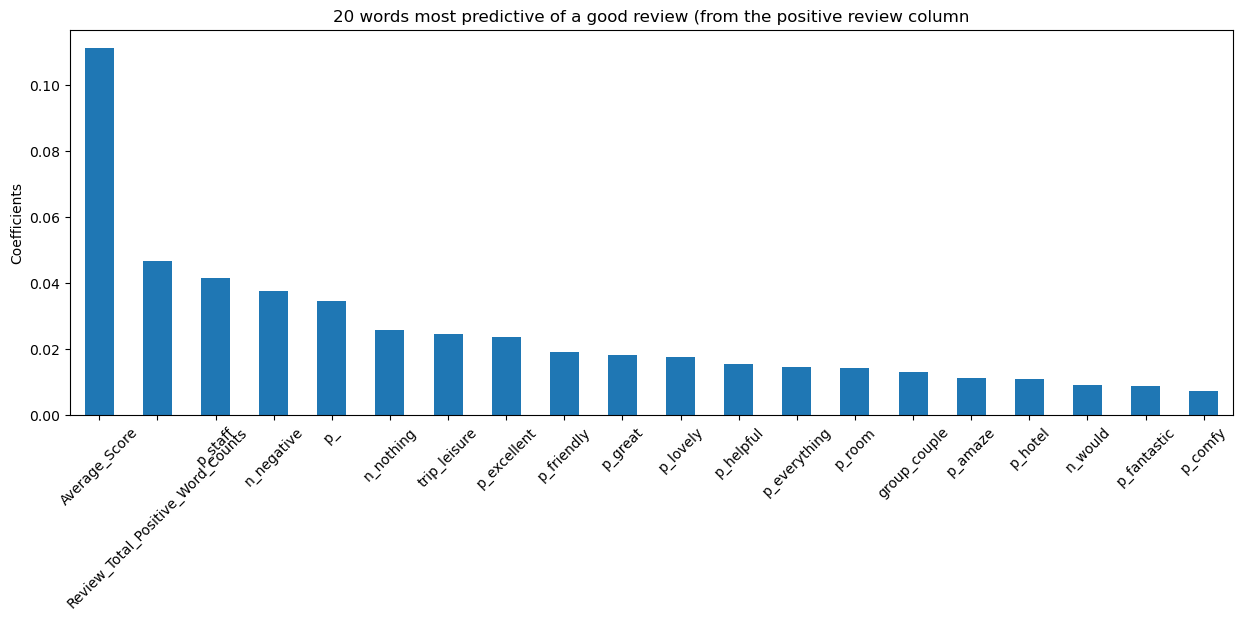

In [11]:
word_counts = pd.DataFrame(
    {"coefficients": my_logreg.coef_[0]},
    index = X_train.columns
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("20 words most predictive of a good review (from the positive review column")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [12]:
#Looking for positive words that start with p_
word_counts.T.filter(like = 'p_')

,p_staff,p_,trip_leisure,p_excellent,p_friendly,p_great,p_lovely,p_helpful,p_everything,p_room,...,p_park,p_reception,p_get,p_walk,p_tube,p_nice,p_positive,trip_biz,p_location,p_good
coefficients,0.041501,0.034443,0.024445,0.023705,0.019114,0.018169,0.017477,0.015316,0.014443,0.014311,...,-0.004002,-0.004048,-0.004321,-0.004849,-0.005009,-0.006798,-0.014414,-0.021785,-0.025135,-0.031528


In [13]:
#Looking for negative words that start with n_
word_counts.T.filter(like = 'n_')

,n_negative,n_nothing,n_would,n_u,n_however,n_day,n_great,n_thing,n_bar,n_think,...,n_tire,n_shower,n_noisy,n_poor,n_bathroom,n_staff,n_bed,n_small,n_,n_room
coefficients,0.037456,0.025599,0.009035,0.005675,0.004555,0.003948,0.003346,0.003345,0.003187,0.003094,...,-0.006982,-0.008829,-0.009561,-0.0106,-0.011685,-0.011687,-0.01364,-0.021245,-0.048799,-0.055064


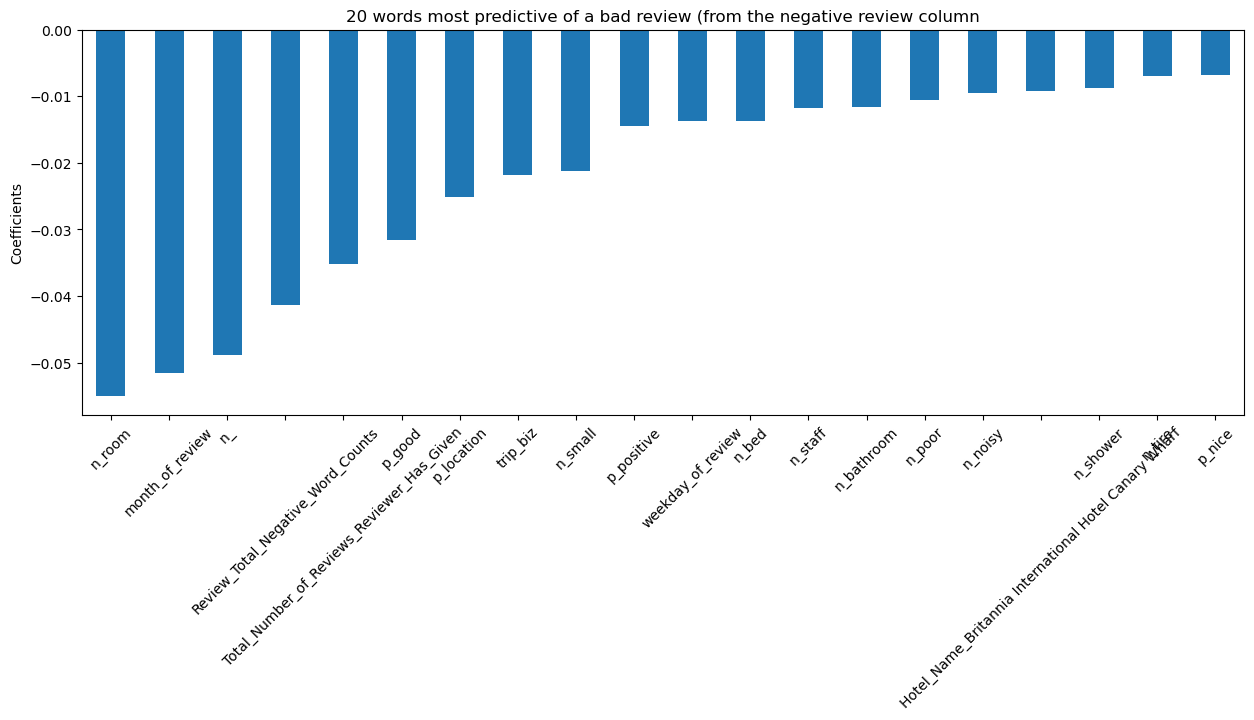

In [14]:
word_counts.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("20 words most predictive of a bad review (from the negative review column")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

**Now, I will reduce the dimensionality of the dataset using PCA, and gaining an understanding of what is the relationship between the number of dimensions and run-time for a logistic regression.**

This will be done in the following way: 
- importing the PCA library
- Instantiating and fitting the PCA.
- tranform the train and test. 
- Doing a comparison of logistic regression to PCA by comparing the train scores. 
- Evaluating compuatation speed. 

In [15]:
from sklearn.decomposition import PCA

In [16]:
#Instantiate and fit
my_PCA = PCA(n_components = 500)
my_PCA.fit(X_train)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train)
X_test_PCA = my_PCA.transform(X_test)

In [17]:
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (9598, 2743)
PCA Transformed: (9598, 500)


In [18]:
#Let's use all the default parameters for now
my_logreg = LogisticRegression()

#Fitting to original data
my_logreg.fit(X_train,y_train)

#Scoring on original train and test sets
print(f'Train Score Accuracy: {my_logreg.score(X_train, y_train)}')
print(f'Test Score Accuracy: {my_logreg.score(X_test, y_test)}')

Train Score Accuracy: 0.7286934778078766
Test Score Accuracy: 0.7288493086477619


/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#Do the same but fit on the PCA transformed data
my_logreg_PCA = LogisticRegression()

#Fitting to PCA data
my_logreg_PCA.fit(X_train_PCA,y_train)

#Scoring on PCA train and test sets
print(f'Train Score Accuracy: {my_logreg_PCA.score(X_train_PCA, y_train)}')
print(f'Test Score Accuracy: {my_logreg_PCA.score(X_test_PCA, y_test)}')

Train Score Accuracy: 0.76620129193582
Test Score Accuracy: 0.767752519334427


/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
%%timeit
my_logreg.fit(X_train, y_train)

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

1.12 s ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
%%timeit
my_logreg_PCA.fit(X_train_PCA,y_train)

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

240 ms ± 6.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**After reducing the dimensionality of the dataset using PCA, it was observed that the test score was higher at around 76% compared to our logistic regression model that recorded a test score of 73%. This is due to the fact that with PCA you are discarding information by compressing/projecting the data down into a lower dimensionality. As result of doing this, the computation speed increased. This is helpful for large datasets. These are advantages of dimesnionality reduction. However, one disadvantage of dimensionality reduction, is that data is lost. This can effect performance for future training algorithms.**  



## K-Nearest Neighbors

### Objectives: 

- Employ a K-Nearest Neighbour classifier on this dataset
- Fit a KNN model to this data and observe what is the accuracy score on the test set?
- Reduce the number of observations (data points) in the dataset and observe what is the relationship between the number of observations and run-time for KNN?
- List one advantage and one disadvantage of reducing the number of observations.
- Use the dataset to find an optimal value for K in the KNN algorithm by split the dataset into train and validation sets.
- Explain what is the issue with splitting the data into train and validation sets after performing vectorization.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

#Instantiating the model 
KNN_model = KNeighborsClassifier()

#Fitting the model 
KNN_model.fit(X_train, y_train)

#Scoring the model 
print("Number of neighbors:", KNN_model.n_neighbors)
print("Test accuracy:", KNN_model.score(X_test, y_test))

Number of neighbors: 5
Test accuracy: 0.6304194984766816


/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**The test accuracy for the KNN Model is 63%. This is lower than the logistic regression model score of 73%, and the PCA score of 77%. Now, I will reduce the number of observations (data points) in the dataset and explore the relationship between the number of observations and run-time for KNN** 

In [24]:
neighbors = range(1, 70, 2)  #Step by 2 so only odd numbers show up.

train_acc = []
test_acc = []

for n in neighbors: 
    print(f"Working on my model with {n} neighbors...", end="\r")
    
    #Instantiate the model & fit it to our data
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train, y_train)
    
    #Score the model on the test set
    train_accuracy = KNN_model.score(X_train, y_train)
    test_accuracy = KNN_model.score(X_test, y_test)
    
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

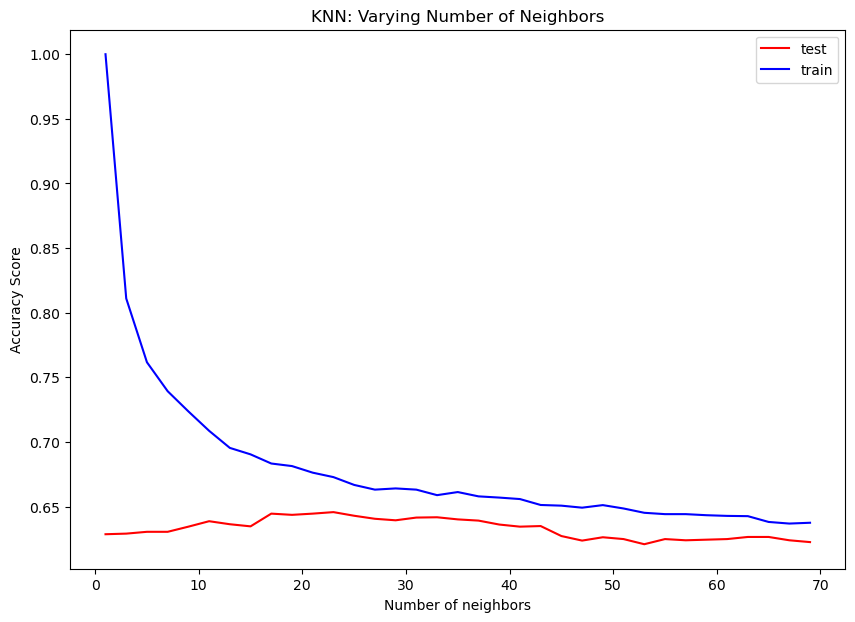

In [25]:
plt.figure(figsize=(10, 7))
plt.plot(neighbors, test_acc, color="red", label="test")
plt.plot(neighbors, train_acc, color="blue", label="train")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of neighbors")
plt.title('KNN: Varying Number of Neighbors')
plt.legend()
plt.show()

#### Observations 

- There is overfitting before n_Neighbors of 22.
- The best values are around 27/28 where train and test accuracies are close, however, some variation is present on which n_neighbros can be chosen.
- Higher values of k, the accuracy is dropping.
- For VERY high values of k, we see a perfect plateau of both train and test accuracy. 

**Advantage and Disadvantage of Reducing the Number of Observations**

One advanatge of reducing the number of observations is that it can result in better computational speeds and better model accuracy. One disadvantage to reducing the number of observations is that it can result in under fitting the model.

**Optimal Value For K**

To find the best value for k, I will use the `np.argmax` function. The dataset has already been split into train and validation sets.

In [26]:
index_of_max = np.argmax(test_acc)

#The corresponding best k value
best_k = neighbors[index_of_max]

best_k

23

Our best K value is 23 neighbors. This was observed in the previous visual that was presented when running the model.

**The issue with splitting the data into train and validation sets after performing vectorization**

The issue with splitting the data into train and validation sets **AFTER** performing vectorization is that by doing this it could introduce data leakage. Data leakage is when your training data contains information about the target, but similar data will not be available when the model is used for prediction. This leads to high performance on the training set (and possibly even the validation data), but the model will perform poorly in production.

## Decision Tree

### Objectives: 

- Fit a decision tree model to this data. What is the accuracy score on the test set?
- Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.
- Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

In [27]:
#Instantiating the model 
DT_model = DecisionTreeClassifier()

#Fitting the model 
DT_model.fit(X_train, y_train)

#Scoring the model 
print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")

The TEST classification accuracy is:  0.6943988750878838


The test accuracy observed for the model is 69%. This is higher than the KNN model which had 63%, but lower than the logistic regression model which had 73%, and the PCA which had 77%.

**Optimal Value for the Maximum Depth of the Decision Tree**

In order to find the optimal value for the maximum depth of the decision tree, I will create a dataframe named `scores` with code that will loop. through different max depth values and records the train and test accuracy. The results are plotted below as well as the parameter giving the highest test accuracy.

Best test scores given by:
   Depth  Train Score  Test Score
5    6.0     0.769119    0.751816 




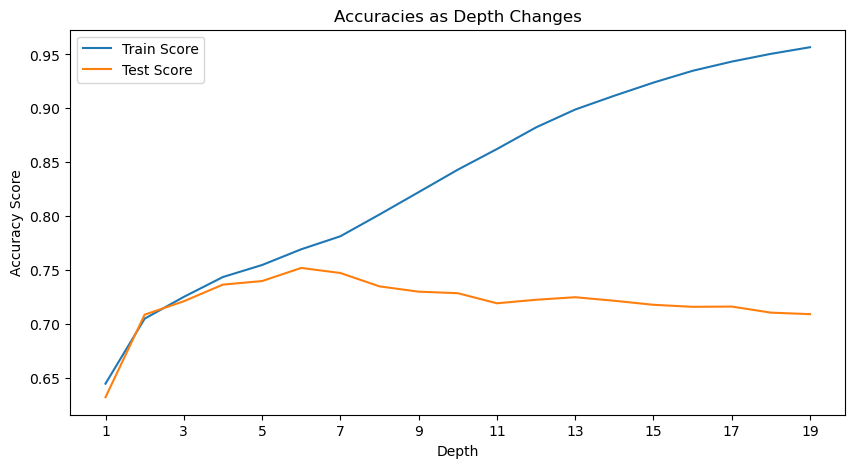

In [28]:
scores = pd.DataFrame()

depth_range = 20

# loop through the max depth values
for max_depth in range(1, depth_range):
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train, y_train)
    
    # scoring
    train_score = dt_model.score(X_train, y_train)
    test_score = dt_model.score(X_test, y_test)
    
    # append results
    scores = scores.append({'Depth': max_depth, 'Train Score': train_score, 'Test Score': test_score}, ignore_index=True)

# best parameter
best_score = scores['Test Score'].max()
print("Best test scores given by:")
print(scores[scores['Test Score'] == best_score], "\n\n")

# comparison plot
plt.figure(figsize=(10,5))
plt.plot('Depth', 'Train Score', data=scores)
plt.plot('Depth', 'Test Score', data=scores)
plt.title('Accuracies as Depth Changes')
plt.xlabel('Depth')
plt.xticks(range(1,depth_range, 2))
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

We see that as the max_depth parameter is increased, both train and test accuracy increases but the model is overfitting. When max_depth is at least 5, the training accuracy is 76% while the test accuracy hovers around 73/74%. We should opt for a small max_depth value (5-6 in this case).

**Two advantages of using decision trees over KNN:** 

1. Decision trees build several simple classifiers which are composed together. This allows them to ignore features . KNN must compare every feature of every data point -- it can't learn which features are important or not.

2. Decision trees make their splits one feature at a time, normalization is not required. KNN can be sensitive to a feature's unit scale. This requires normalization of the data before using KNN classifiers.

**Two weaknesses of decision trees:**

1. Regression decision tree models can never predict values outside the range it has seen in the training set. No values larger than the maximum value in the training set, or lower than the minimum value in the training set will be predicted.

2. Decision trees tend to be very sensitive to minor changes in data, and can introduce serious biases as you move further down the tree.

**What is the purpose of the validation set, and how is it different than the test set?**

The validation sets contain different samples to evaluate trained ML models. It is still possible to tune and control the model at this stage. A test set is a separate sample to provide an unbiased final evaluation of a model fit. The inputs are similar to the previous stages but not the same data.

## Logistic Regression Part 2

### Objectives: 

- Perform a 5-fold cross validation to optimize the hyperparameters of your model.
- What does your confusion matrix look like for your best model on the test set?

In [29]:
#Importing the necessary library
from sklearn.model_selection import cross_val_score

In [30]:
# Splitting out 20% for test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X_test, y_test, test_size = 0.2,random_state=1)

In [31]:
#Instanitating the model
my_logreg = LogisticRegression(random_state=1)

#Fitting model on 5 folds.
#The variable "scores" will hold 5 accuracy scores, 
#Each from a different train and validation split
scores = cross_val_score(my_logreg, X_remainder, y_remainder, cv = 5)
print(scores)

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[0.73206442 0.74231332 0.75841874 0.72727273 0.75659824]


/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
#Every score corresponds to a fold
for i in range(len(scores)) :
    print(f"Fold {i+1}: {scores[i]}")

Fold 1: 0.7320644216691069
Fold 2: 0.7423133235724744
Fold 3: 0.7584187408491947
Fold 4: 0.7272727272727273
Fold 5: 0.7565982404692082


In [33]:
print(f"Average Score:{np.mean(scores)}")

Average Score:0.7433334907665424


After performing a 5-fold cross validation to optimize the hyperparameters of the model it was observed that Fold 3 had the highest accuracy with 76%. The average score over the 5 folds is 74%. Now, I will move forward with creating a confusion matrix for best model of the test set.

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


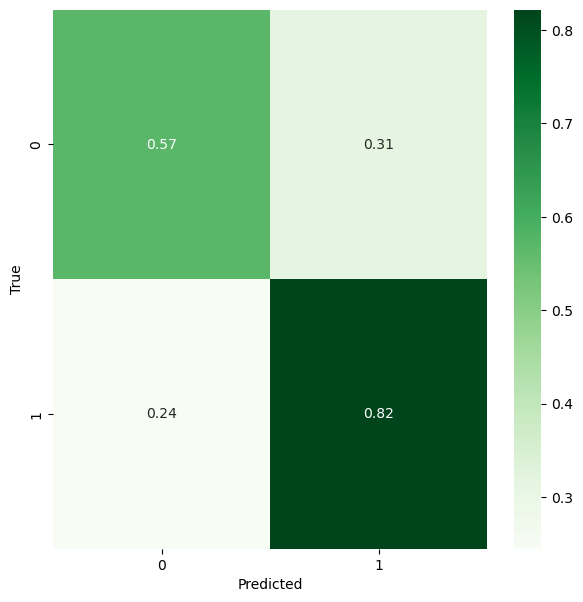

In [37]:
# Get class predictions
my_logreg.fit(X_train, y_train)
y_pred = my_logreg.predict(X_test)

#Generate confusion matrix
hotelr_matrix = confusion_matrix(y_test, y_pred)

#Normalizing the confusion matrix
hotelr_matrix_normalized = hotelr_matrix.astype('float')/hotelr_matrix.sum(axis=1)

#Creating a heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(hotelr_matrix_normalized, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

From the normalized confusion matrix, it can be observed that:

- True Positive (TP): Correctly predicted that 0.82 belongs to 'good reviews'
- False Positive (FP): Incorrectly predict that 0.24 belongs to 'good reviews'
- True Negative (TN): Correctly predict that 0.57 belongs to 'bad reviews'
- False Negative (FN): Incorrectly predict that 0.31 belongs to 'bad reviews'.

## Feature Engineering

### Objectives

- Create one new feature of choice
- Explain your new feature and why you consider it will improve accuracy
- Run the model from question 5 again. Re-optimize my hyperparameters, and observe if the accuracy score of my best model improved on the test set after adding the new feature created.

The new feature I will create will be called `Word_Count` . This will be a combination of `Review_Total_Negative_Word_Counts_` + `Review_Total_Positive_Word_Counts` . I think it may improve the accuracy of the model by being able to to be a good predictor of analyizing total word count has a way to differtiate positive from negative. For example, a negative review or rating may have more words than a positive review or rating. 

In [39]:
#Creating the new feature
test['Word_Count'] = (test['Review_Total_Negative_Word_Counts']+test['Review_Total_Positive_Word_Counts']).astype(int)

In [40]:
#Seeing if the new feature is in the dataset.
test.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,Word_Count
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,6
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,1,167
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,1,9
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,19
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,13


In [41]:
#Importing the necessary library
from sklearn.model_selection import cross_val_score

In [42]:
# Splitting out 20% for test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X_test, y_test, test_size = 0.2,random_state=1)

In [43]:
#Instanitating the model
my_logreg = LogisticRegression(random_state=1)

#Fitting model on 5 folds.
#The variable "scores" will hold 5 accuracy scores, 
#Each from a different train and validation split
scores = cross_val_score(my_logreg, X_remainder, y_remainder, cv = 5)
print(scores)

/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[0.7080292  0.67883212 0.64233577 0.72794118 0.70588235]


/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ds/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [44]:
#Every score corresponds to a fold
for i in range(len(scores)) :
    print(f"Fold {i+1}: {scores[i]}")

Fold 1: 0.708029197080292
Fold 2: 0.6788321167883211
Fold 3: 0.6423357664233577
Fold 4: 0.7279411764705882
Fold 5: 0.7058823529411765


In [45]:
print(f"Average Score:{np.mean(scores)}")

Average Score:0.6926041219407472


After adding the new feature `Word_Count` it was observed that the accuracy of the model actually decreased, however, not too much. 

## Conclusion

This notebook was a continuation of hotel reviews using NLP. It focused on developing several machine learning models to correctly label the sentiment behind hotel reviews/ratings. Listed below are the following models used with test accuracy: 

1. Logistic Regression - (73%)
2. Logistic Regression with PCA - (77%)
3. K Nearest Neighbors (KNN) - (63%) 
4. Decision Trees (DT) - (69%) 


The combination of logistic regression and PCA was the most effective model. This model will be the best indicator with respects to achieving higher ratings ('good') with hotel reviews.  